# 1. Préparation des données, analyses et extraction des transcriptions

## 1.1. Preparations des données

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [2]:
import os
import pandas as pd
import torchaudio.transforms as T
pd.set_option('display.max_colwidth', None)

In [3]:
import torchaudio
print(torchaudio.__version__)

2.7.1+cpu


In [4]:
# Charger les transcriptions
df = pd.read_excel("C:/Users/Christian/Desktop/YembaTones/dataset2.xlsx")


In [5]:
df.tail()

,WordId,Yemba,Speaker,GroupeId,Statement,Syllabe 1,Tone 1,Syllabe 2,Tone 2,Syllabe 3,Tone 3
3779,3780,lezēn,11,146,2,le,bas,zēn,moyen,NaN,NaN
3780,3781,nzeŋ,11,147,1,n,bas,zeŋ,bas,NaN,NaN
3781,3782,nzéŋ,11,147,2,n,bas,zéŋ,haut,NaN,NaN
3782,3783,nzɔ̄ŋ,11,148,1,n,bas,zɔ̄ŋ,moyen,NaN,NaN
3783,3784,nzɔŋ,11,148,2,n,bas,zɔŋ,bas,NaN,NaN


In [6]:
print(df.isnull().sum())

WordId          0
Yemba           0
Speaker         0
GroupeId        0
Statement       0
Syllabe 1       0
Tone 1          0
Syllabe 2      22
Tone 2         22
Syllabe 3    3762
Tone 3       3762
dtype: int64


In [7]:
print(len(df))

3784


In [8]:
# Suppression définitive des colonnes Syllabe 3 et Tone 3
df.drop(columns=["Syllabe 3", "Tone 3"], inplace=True)

In [9]:
# Remplacement des valeurs manquates
df["Syllabe 2"] = df["Syllabe 2"].fillna("∅")
df["Tone 2"]    = df["Tone 2"].fillna("∅")

In [10]:
# Supprimer les lignes où Syllabe 2 OU Tone 2 sont manquants ou égaux à "∅"
df = df[~((df["Syllabe 2"] == "∅") | (df["Tone 2"] == "∅"))]
df = df.reset_index(drop=True)  # Reindexer proprement

In [11]:
# Génère les chemins des fichiers audio associés
def get_audio_path(row):
    return f"C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_{row['Speaker']}/group_{row['GroupeId']}/spkr_{row['Speaker']}_group_{row['GroupeId']}_statement_{int(row['Statement'])}.wav"

df["audio_path"] = df.apply(get_audio_path, axis=1)

In [12]:
df.tail()

,WordId,Yemba,Speaker,GroupeId,Statement,Syllabe 1,Tone 1,Syllabe 2,Tone 2,audio_path
3757,3780,lezēn,11,146,2,le,bas,zēn,moyen,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_11/group_146/spkr_11_group_146_statement_2.wav
3758,3781,nzeŋ,11,147,1,n,bas,zeŋ,bas,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_11/group_147/spkr_11_group_147_statement_1.wav
3759,3782,nzéŋ,11,147,2,n,bas,zéŋ,haut,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_11/group_147/spkr_11_group_147_statement_2.wav
3760,3783,nzɔ̄ŋ,11,148,1,n,bas,zɔ̄ŋ,moyen,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_11/group_148/spkr_11_group_148_statement_1.wav
3761,3784,nzɔŋ,11,148,2,n,bas,zɔŋ,bas,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_11/group_148/spkr_11_group_148_statement_2.wav


In [13]:
# Combiner les syllabes avec tons pour créer une transcription syllabique
def combine_syllables(row):
    syllables = []
    for i in range(1, 4):
        syll = row.get(f"Syllabe {i}")
        tone = row.get(f"Tone {i}")
        if pd.notnull(syll) and pd.notnull(tone):
            syllables.append(f"{syll}|{tone}")
    return " ".join(syllables)

df["syllable_transcript"] = df.apply(combine_syllables, axis=1)

In [14]:
df.head()

,WordId,Yemba,Speaker,GroupeId,Statement,Syllabe 1,Tone 1,Syllabe 2,Tone 2,audio_path,syllable_transcript
0,1,Apa,1,1,1,a,bas,pa,bas,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_1/group_1/spkr_1_group_1_statement_1.wav,a|bas pa|bas
1,2,Apā,1,1,2,a,bas,pā,moyen,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_1/group_1/spkr_1_group_1_statement_2.wav,a|bas pā|moyen
2,3,Apá,1,1,3,a,bas,pá,haut,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_1/group_1/spkr_1_group_1_statement_3.wav,a|bas pá|haut
3,4,Api,1,2,1,a,bas,pi,bas,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_1/group_2/spkr_1_group_2_statement_1.wav,a|bas pi|bas
4,5,Apī,1,2,2,a,bas,pī,moyen,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_1/group_2/spkr_1_group_2_statement_2.wav,a|bas pī|moyen


## 1.2. Analyse

In [15]:
df.describe()

,WordId,Speaker,GroupeId,Statement
count,3762.000000,3762.000000,3762.000000,3762.000000
mean,1892.307018,6.000000,71.409357,1.730994
std,1092.515348,3.162698,42.952047,0.743985
min,1.000000,1.000000,1.000000,1.000000
25%,947.250000,3.000000,33.000000,1.000000
50%,1891.500000,6.000000,68.500000,2.000000
75%,2837.750000,9.000000,109.000000,2.000000
max,3784.000000,11.000000,149.000000,4.000000


In [16]:
import pandas as pd

# Compter toutes les syllabes
syllabes = pd.concat([df['Syllabe 1'], df['Syllabe 2']])
syllabe_counts = syllabes.value_counts()

# Afficher les 10 syllabes les plus fréquentes
print("Top 10 syllabes les plus fréquentes :")
print(syllabe_counts.head(10))

# Afficher le nombre total de syllabes uniques
print(f"\nNombre total de syllabes uniques : {syllabe_counts.shape[0]}")


Top 10 syllabes les plus fréquentes :
n      1287
Le      924
m       462
a       440
ŋ       176
N       143
le       99
Me       66
gap      44
tā      33
dtype: int64

Nombre total de syllabes uniques : 301


n        1287
Le        924
m         462
a         440
ŋ         176
N         143
le         99
Me         66
gap        44
tā        33
zɔ̄ŋ       33
kwɛ̄t      33
lúŋ       33
ń         33
lūŋ       33
M          33
zɔŋ        22
tsɔ́ŋ      22
tshí      22
cɔ̄k       22
dtype: int64


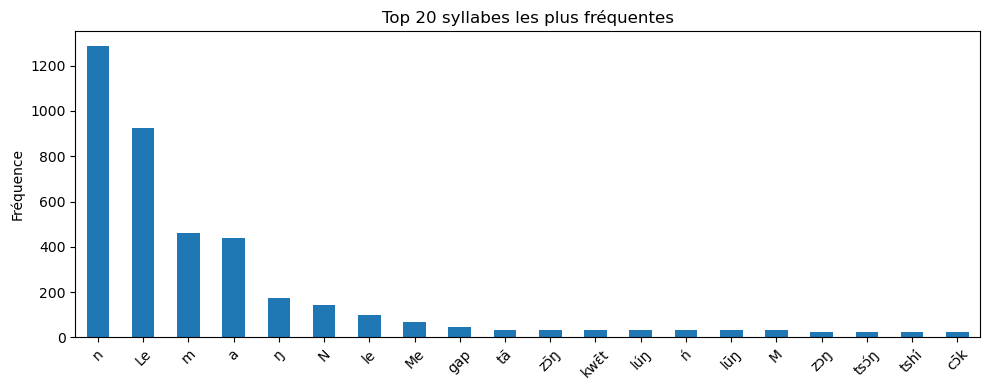

In [17]:
import matplotlib.pyplot as plt

print(syllabe_counts.head(20))

syllabe_counts.head(20).plot(kind='bar', figsize=(10, 4), title='Top 20 syllabes les plus fréquentes')
plt.ylabel("Fréquence")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:
from collections import Counter

def normalize_tone(t):
    if isinstance(t, str):
        return t.strip().lower()
    return t

# Normalisation des deux colonnes
df['Tone 1 norm'] = df['Tone 1'].apply(normalize_tone)
df['Tone 2 norm'] = df['Tone 2'].apply(normalize_tone)

# Comptage par colonne
tone1_dist = Counter(df['Tone 1 norm'])
tone2_dist = Counter(df['Tone 2 norm'])

# Affichage des distributions
print("Distribution nettoyée des tons dans Tone 1 :")
for k in ['bas', 'haut', 'moyen']:
    print(f"{k:<6}: {tone1_dist.get(k, 0)}")

print("\nDistribution nettoyée des tons dans Tone 2 :")
for k in ['bas', 'haut', 'moyen']:
    print(f"{k:<6}: {tone2_dist.get(k, 0)}")


Distribution nettoyée des tons dans Tone 1 :
bas   : 2651
haut  : 1111
moyen : 0

Distribution nettoyée des tons dans Tone 2 :
bas   : 1287
haut  : 990
moyen : 1485


Distribution nettoyée des tons dans Tone 1 :
bas   : 2651
haut  : 1111
moyen : 0

Distribution nettoyée des tons dans Tone 2 :
bas   : 1287
haut  : 990
moyen : 1485


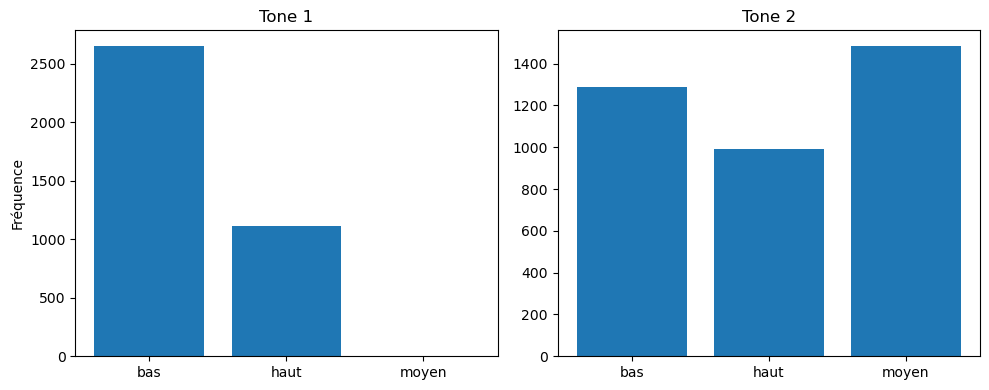

In [19]:
from collections import Counter
import matplotlib.pyplot as plt

# Fonction de normalisation des tons
def normalize_tone(t):
    if isinstance(t, str):
        return t.strip().lower()
    return t

# Normalisation des deux colonnes
df['Tone 1 norm'] = df['Tone 1'].apply(normalize_tone)
df['Tone 2 norm'] = df['Tone 2'].apply(normalize_tone)

# Comptage par colonne
tone1_dist = Counter(df['Tone 1 norm'])
tone2_dist = Counter(df['Tone 2 norm'])

# Affichage texte
print("Distribution nettoyée des tons dans Tone 1 :")
for k in ['bas', 'haut', 'moyen']:
    print(f"{k:<6}: {tone1_dist.get(k, 0)}")

print("\nDistribution nettoyée des tons dans Tone 2 :")
for k in ['bas', 'haut', 'moyen']:
    print(f"{k:<6}: {tone2_dist.get(k, 0)}")

# Affichage graphique
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(['bas', 'haut', 'moyen'], [tone1_dist.get(k, 0) for k in ['bas', 'haut', 'moyen']])
plt.title("Tone 1")
plt.ylabel("Fréquence")

plt.subplot(1, 2, 2)
plt.bar(['bas', 'haut', 'moyen'], [tone2_dist.get(k, 0) for k in ['bas', 'haut', 'moyen']])
plt.title("Tone 2")

plt.tight_layout()
plt.show()


## 1.3 Ponderation des classes

syll_imbalance_ratio = syllabe_counts.max() / syllabe_counts.min()
tone_imbalance_ratio = tone_counts.max() / tone_counts.min()

print(f"Déséquilibre syllabes : {syll_imbalance_ratio:.2f}")
print(f"Déséquilibre tons : {tone_imbalance_ratio:.2f}")


In [20]:
print(df.columns)

Index(['WordId', 'Yemba', 'Speaker', 'GroupeId', 'Statement', 'Syllabe 1',
       'Tone 1', 'Syllabe 2', 'Tone 2', 'audio_path', 'syllable_transcript',
       'Tone 1 norm', 'Tone 2 norm'],
      dtype='object')


In [21]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import torch

# --- 1. Syllabe 1 ---
syll1_classes = sorted(df['Syllabe 1'].dropna().unique())
syll1_weights = compute_class_weight(class_weight='balanced',
                                     classes=syll1_classes,
                                     y=df['Syllabe 1'].dropna())
syll1_weights_tensor = torch.tensor(syll1_weights, dtype=torch.float32)

# --- 2. Tone 1 norm ---
tone1_classes = sorted(df['Tone 1 norm'].dropna().unique())
tone1_weights = compute_class_weight(class_weight='balanced',
                                     classes=tone1_classes,
                                     y=df['Tone 1 norm'].dropna())
tone1_weights_tensor = torch.tensor(tone1_weights, dtype=torch.float32)

# --- 3. Syllabe 2 ---
syll2_classes = sorted(df['Syllabe 2'].dropna().unique())
syll2_weights = compute_class_weight(class_weight='balanced',
                                     classes=syll2_classes,
                                     y=df['Syllabe 2'].dropna())
syll2_weights_tensor = torch.tensor(syll2_weights, dtype=torch.float32)

# --- 4. Tone 2 norm ---
tone2_classes = sorted(df['Tone 2 norm'].dropna().unique())
tone2_weights = compute_class_weight(class_weight='balanced',
                                     classes=tone2_classes,
                                     y=df['Tone 2 norm'].dropna())
tone2_weights_tensor = torch.tensor(tone2_weights, dtype=torch.float32)

syll1_loss_fn = torch.nn.CrossEntropyLoss(weight=syll1_weights_tensor)
tone1_loss_fn = torch.nn.CrossEntropyLoss(weight=tone1_weights_tensor)
syll2_loss_fn = torch.nn.CrossEntropyLoss(weight=syll2_weights_tensor)
tone2_loss_fn = torch.nn.CrossEntropyLoss(weight=tone2_weights_tensor)


# 2. Data augmentation et Extraction des caractéristiques audio avec MelSpectrogram

## 2.1. Data augmentation

In [22]:
import torchaudio
import torchaudio.transforms as T
import random
import torch

def augment_waveform(waveform, sample_rate=16000):
    """Applique des transformations audio de data augmentation."""
    
    # 1. Ajouter bruit blanc (SNR ~20 dB)
    if random.random() < 0.5:
        noise = torch.randn_like(waveform) * 0.005
        waveform = waveform + noise

    # 2. Time shifting (décalage temporel aléatoire)
    if random.random() < 0.5:
        shift = int(random.uniform(-0.1, 0.1) * waveform.size(1))  # ±10%
        waveform = torch.roll(waveform, shifts=shift, dims=1)

    # 3. Pitch shift
    if random.random() < 0.3:
        semitone_shift = random.choice([-2, -1, 1, 2])
        pitch_shift = T.PitchShift(sample_rate, n_steps=semitone_shift)
        waveform = pitch_shift(waveform)

    # 4. Time stretch (entre 0.8x et 1.2x)
    if random.random() < 0.3:
        stretch_rate = random.uniform(0.8, 1.2)
        stretch = T.TimeStretch()
        spec = T.Spectrogram()(waveform)
        spec_stretched = stretch(spec, stretch_rate)
        waveform = torchaudio.functional.istft(spec_stretched, n_fft=400)
        waveform = waveform.unsqueeze(0)  # [1, T]

    return waveform


## 2.2. Melspectrogram

In [23]:
import torchaudio
import torch

def extract_melspectrogram(file_path, sample_rate=16000, n_mels=80):
    try:
        waveform, sr = torchaudio.load(file_path)

        # Force mono (si 2 canaux, on moyenne)
        if waveform.shape[0] > 1:
            waveform = waveform.mean(dim=0, keepdim=True)

        # Resample si nécessaire
        if sr != sample_rate:
            resampler = torchaudio.transforms.Resample(sr, sample_rate)
            waveform = resampler(waveform)

        # Transformer Mel spectrogramme
        mel_transform = torchaudio.transforms.MelSpectrogram(
            sample_rate=sample_rate,
            n_fft=1024,
            hop_length=256,
            n_mels=n_mels
        )
        mel_spec = mel_transform(waveform)

        # Convertir en dB
        mel_spec = torchaudio.transforms.AmplitudeToDB()(mel_spec)

        # [1, F, T] → [T, F]
        mel_spec = mel_spec.squeeze(0).transpose(0, 1)

        # Vérifier la forme finale
        if mel_spec.shape[1] != n_mels:
            raise ValueError(f"Mel spectrogram with invalid feature size: {mel_spec.shape}")

        return mel_spec

    except Exception as e:
        #print(f"Erreur lors du traitement de {file_path}: {e}")
        raise e


In [24]:
def extract_melspectrogram_augmented(file_path, sample_rate=16000, n_mels=80):
    try:
        waveform, sr = torchaudio.load(file_path)

        if waveform.shape[0] > 1:
            waveform = waveform.mean(dim=0, keepdim=True)

        if sr != sample_rate:
            resampler = T.Resample(sr, sample_rate)
            waveform = resampler(waveform)

        # --- AJOUT DES AUGMENTATIONS ---
        waveform = augment_waveform(waveform, sample_rate=sample_rate)

        mel_transform = T.MelSpectrogram(
            sample_rate=sample_rate,
            n_fft=1024,
            hop_length=256,
            n_mels=n_mels
        )
        mel_spec = mel_transform(waveform)
        mel_spec = T.AmplitudeToDB()(mel_spec)
        mel_spec = mel_spec.squeeze(0).transpose(0, 1)

        if mel_spec.shape[1] != n_mels:
            raise ValueError(f"Mel spectrogram with invalid feature size: {mel_spec.shape}")

        return mel_spec
    except Exception as e:
        raise e


# 3. Tokenisation syllabique et construction du vocabulaire

In [25]:
from collections import Counter

# Créer un vocabulaire syllabique
syllables = df["syllable_transcript"].str.split().sum()
syllable_counts = Counter(syllables)
vocab = {s: i + 1 for i, s in enumerate(sorted(syllable_counts))}
vocab["<BLANK>"] = 0  # pour CTC

# Encodage des transcriptions
def encode_transcript(syllable_transcript):
    return [vocab[s] for s in syllable_transcript.split()]

df["encoded"] = df["syllable_transcript"].map(encode_transcript)

In [26]:
df.head()

,WordId,Yemba,Speaker,GroupeId,Statement,Syllabe 1,Tone 1,Syllabe 2,Tone 2,audio_path,syllable_transcript,Tone 1 norm,Tone 2 norm,encoded
0,1,Apa,1,1,1,a,bas,pa,bas,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_1/group_1/spkr_1_group_1_statement_1.wav,a|bas pa|bas,bas,bas,"[9, 198]"
1,2,Apā,1,1,2,a,bas,pā,moyen,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_1/group_1/spkr_1_group_1_statement_2.wav,a|bas pā|moyen,bas,moyen,"[9, 201]"
2,3,Apá,1,1,3,a,bas,pá,haut,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_1/group_1/spkr_1_group_1_statement_3.wav,a|bas pá|haut,bas,haut,"[9, 199]"
3,4,Api,1,2,1,a,bas,pi,bas,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_1/group_2/spkr_1_group_2_statement_1.wav,a|bas pi|bas,bas,bas,"[9, 207]"
4,5,Apī,1,2,2,a,bas,pī,moyen,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_1/group_2/spkr_1_group_2_statement_2.wav,a|bas pī|moyen,bas,moyen,"[9, 210]"


In [27]:
df["audio_path"].tail()

3757    C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_11/group_146/spkr_11_group_146_statement_2.wav
3758    C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_11/group_147/spkr_11_group_147_statement_1.wav
3759    C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_11/group_147/spkr_11_group_147_statement_2.wav
3760    C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_11/group_148/spkr_11_group_148_statement_1.wav
3761    C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_11/grou

In [28]:
df["exists"] = df["audio_path"].apply(lambda p: os.path.exists(p))
df = df[df["exists"]]

missing = df[~df["exists"]]
print("Fichiers manquants :", len(missing))
print(missing[["audio_path", "Speaker", "GroupeId", "Statement"]].head())


Fichiers manquants : 0
Empty DataFrame
Columns: [audio_path, Speaker, GroupeId, Statement]
Index: []


# 4. Split en train/valid/test (80/10/10)

In [29]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)
val, test = train_test_split(test, test_size=0.5, random_state=42)

print(len(train), "train")
print(len(val), "val")
print(len(test), "test")


2668 train
334 val
334 test


In [30]:
train.columns

Index(['WordId', 'Yemba', 'Speaker', 'GroupeId', 'Statement', 'Syllabe 1',
       'Tone 1', 'Syllabe 2', 'Tone 2', 'audio_path', 'syllable_transcript',
       'Tone 1 norm', 'Tone 2 norm', 'encoded', 'exists'],
      dtype='object')

In [31]:
train = train.rename(columns={"audio_path": "path"})
val = val.rename(columns={"audio_path": "path"})
test = test.rename(columns={"audio_path": "path"})


In [32]:
# Vérifie que 'path' et 'encoded' sont bien dans chaque ligne
train = train[train['path'].notnull() & train['encoded'].notnull()]
val = val[val['path'].notnull() & val['encoded'].notnull()]
test = test[test['path'].notnull() & test['encoded'].notnull()]


# 5. Dataset & DataLoader PyTorch

In [33]:
from torch.utils.data import Dataset
import torch

class YembaDataset(Dataset):
    def __init__(self, dataframe, processor, vocab):
        """
        Args:
            dataframe: DataFrame contenant les colonnes 'path' et 'encoded'
            processor: fonction pour extraire un Mel spectrogramme à partir d'un fichier audio
            vocab: dictionnaire {syllabe: index}
        """
        self.data = dataframe
        self.processor = processor
        self.vocab = vocab

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        try:
            row = self.data.iloc[idx]
            audio_path = row["path"]
            target_seq = row["encoded"]

            # 1. Extraire les features [T, F]
            mel_spec = self.processor(audio_path)

            if not isinstance(mel_spec, torch.Tensor) or mel_spec.dim() != 2 or mel_spec.shape[0] == 0:
                raise ValueError("Mel spectrogramme vide ou invalide")
            
            # 2. Convertir les cibles en Tensor
            target_tensor = torch.tensor(target_seq, dtype=torch.long)

            return mel_spec, target_tensor

        except Exception as e:
            #print(f"[!] Erreur à l’index {idx} : {e}")
            return None


# 6. Collate function pour padding

In [41]:
import torch
import torch.nn.utils.rnn as rnn_utils

"""PAD_TOKEN = "<pad>"
PAD_IDX = vocab.get(PAD_TOKEN, 0)

def collate_fn(batch):
    ""
    Collate function pour DataLoader :
    batch : list de tuples (mel_spec, target_tensor)
            - mel_spec: Tensor de forme [T, F]
            - target_tensor: Tensor de forme [L]
    "
    # Supprimer les entrées invalides
    "batch = [sample for sample in batch if sample is not None]
    
    for i, item in enumerate(batch):
        if not isinstance(item, tuple):
            print(f"[!] Élément invalide à l’index {i} : {item}")
        elif not isinstance(item[0], torch.Tensor):
            print(f"[!] Mel_spec invalide à l’index {i} : {item[0]}")
        elif not isinstance(item[1], torch.Tensor):
            print(f"[!] Target invalide à l’index {i} : {item[1]}")""
    
    if len(batch) == 0:
        # Retourne des tensors vides pour éviter les plantages en cas de batch vide
        return (
            torch.empty(0, 0, 0),
            torch.empty(0, 0, dtype=torch.long),
            torch.empty(0, dtype=torch.long),
            torch.empty(0, dtype=torch.long)
        )

    # Décompacter les mel_specs et cibles
    mels, targets = zip(*batch)

    # Pad des mel spectrogrammes (batch_first = True → [B, Tmax, F])
    mels_padded = rnn_utils.pad_sequence(mels, batch_first=True)
    input_lengths = torch.tensor([mel.shape[0] for mel in mels], dtype=torch.long)

    # Pad des séquences cibles
    targets_padded = rnn_utils.pad_sequence(targets, batch_first=True, padding_value=PAD_IDX)
    target_lengths = torch.tensor([t.shape[0] for t in targets], dtype=torch.long)

    return mels_padded, targets_padded, input_lengths, target_lengths"""

def collate_fn(batch):
    # Supprimer les entrées None
    batch = [sample for sample in batch if sample is not None]

    # Si le batch est vide, retourner des tenseurs vides valides
    if len(batch) == 0:
        return (
            torch.empty(0, 0, 80),  # supposons F=80 (n_mels)
            torch.empty(0, 0, dtype=torch.long),
            torch.empty(0, dtype=torch.long),
            torch.empty(0, dtype=torch.long)
        )

    try:
        mels, targets = zip(*batch)

        mels_padded = rnn_utils.pad_sequence(mels, batch_first=True)
        input_lengths = torch.tensor([mel.shape[0] for mel in mels], dtype=torch.long)

        targets_padded = rnn_utils.pad_sequence(targets, batch_first=True, padding_value=PAD_IDX)
        target_lengths = torch.tensor([len(t) for t in targets], dtype=torch.long)

        return mels_padded, targets_padded, input_lengths, target_lengths

    except Exception as e:
        print(f"[!] Erreur dans collate_fn : {e}")
        return (
            torch.empty(0, 0, 80),
            torch.empty(0, 0, dtype=torch.long),
            torch.empty(0, dtype=torch.long),
            torch.empty(0, dtype=torch.long)
        )


In [42]:
from torch.utils.data import DataLoader

train_dataset = YembaDataset(train, processor=extract_melspectrogram_augmented, vocab=vocab)
val_dataset = YembaDataset(val, processor=extract_melspectrogram, vocab=vocab)
test_dataset = YembaDataset(test, processor=extract_melspectrogram, vocab=vocab)


train_loader = DataLoader(train_dataset, batch_size=4, shuffle=False, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False, collate_fn=collate_fn)

# 7. Modèle GRU+ATTENTION

In [43]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class GRUEncoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers=2, dropout=0.3):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers=num_layers,
                          batch_first=True, bidirectional=True, dropout=dropout)

    def forward(self, x):
        outputs, hidden = self.gru(x)  # outputs: [B, T, 2*H], hidden: [2L, B, H]
        return outputs, hidden


class Attention(nn.Module):
    def __init__(self, hidden_dim):
        super().__init__()
        self.attn = nn.Linear(hidden_dim * 3, 1)

    def forward(self, decoder_hidden, encoder_outputs):
        # decoder_hidden: [B, H]
        # encoder_outputs: [B, T, 2*H]
        seq_len = encoder_outputs.size(1)
        decoder_hidden = decoder_hidden.unsqueeze(1).repeat(1, seq_len, 1)  # [B, T, H]
        concat = torch.cat((decoder_hidden, encoder_outputs), dim=2)        # [B, T, 3H]
        energy = self.attn(concat).squeeze(2)                               # [B, T]
        attn_weights = F.softmax(energy, dim=1)                             # [B, T]
        context = torch.bmm(attn_weights.unsqueeze(1), encoder_outputs)     # [B, 1, 2H]
        return context.squeeze(1), attn_weights


class GRUDecoder(nn.Module):
    def __init__(self, hidden_dim, output_dim, num_layers=1, dropout=0.3):
        super().__init__()
        self.gru = nn.GRU(hidden_dim * 2, hidden_dim, num_layers=num_layers,
                          batch_first=True, dropout=dropout)
        self.out = nn.Linear(hidden_dim, output_dim)

    def forward(self, context_vector, hidden):
        # context_vector: [B, 2H] → expand to [B, 1, 2H]
        input_step = context_vector.unsqueeze(1)
        output, hidden = self.gru(input_step, hidden)  # output: [B, 1, H]
        prediction = self.out(output.squeeze(1))       # [B, vocab_size]
        return prediction, hidden


class GRUSeq2Seq(nn.Module):
    def __init__(self, input_dim, hidden_dim, vocab_size, encoder_layers=2, decoder_layers=1):
        super().__init__()
        self.bridge = nn.Linear(hidden_dim * 2, hidden_dim)
        self.encoder = GRUEncoder(input_dim, hidden_dim, encoder_layers)
        self.attention = Attention(hidden_dim)
        self.decoder = GRUDecoder(hidden_dim, vocab_size, decoder_layers)
        self.hidden_dim = hidden_dim
        self.encoder_layers = encoder_layers

    def forward(self, x, max_len=100):
        encoder_outputs, hidden = self.encoder(x)  # hidden: [2*num_layers, B, H]
        batch_size = x.size(0)

        # [2*L, B, H] → [L, 2, B, H]
        hidden = hidden.view(self.encoder_layers, 2, batch_size, self.hidden_dim)

        # Concat direction=0 et direction=1 → [L, B, 2H]
        hidden_cat = torch.cat((hidden[:, 0], hidden[:, 1]), dim=-1)

        # Projeter en [L, B, H] via Linear (bridge)
        if not hasattr(self, "bridge"):
            self.bridge = nn.Linear(self.hidden_dim * 2, self.hidden_dim).to(hidden_cat.device)

        hidden_proj = self.bridge(hidden_cat)  # [L, B, H]

        # Si besoin, adapter au nombre de couches du décodeur
        if self.encoder_layers < self.decoder.gru.num_layers:
            # Répéter pour compléter
            num_missing = self.decoder.gru.num_layers - self.encoder_layers
            repeat_hidden = hidden_proj[-1:, :, :].repeat(num_missing, 1, 1)
            hidden_proj = torch.cat([hidden_proj, repeat_hidden], dim=0)
        elif self.encoder_layers > self.decoder.gru.num_layers:
            hidden_proj = hidden_proj[:self.decoder.gru.num_layers]

        hidden = hidden_proj  # [decoder_layers, B, H]

        outputs = []
        for _ in range(max_len):
            context, attn_weights = self.attention(hidden[-1], encoder_outputs)  # [B, 2H]
            prediction, hidden = self.decoder(context, hidden)  # hidden: [decoder_layers, B, H]
            outputs.append(prediction)

        outputs = torch.stack(outputs, dim=1)  # [B, max_len, vocab_size]
        return outputs


In [44]:
import torch
import torch.nn as nn
from model import GRUSeq2Seq  # si défini dans model.py
# ou bien directement : from ton_module import GRUSeq2Seq

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instanciation du modèle avec ton vocabulaire
model = GRUSeq2Seq(input_dim=80, hidden_dim=256, vocab_size=len(vocab)).to(device)

# Critère de perte adapté à une sortie par pas de temps
PAD_TOKEN = "<pad>"
PAD_IDX = vocab[PAD_TOKEN] if PAD_TOKEN in vocab else 0  # ou choisis un autre index
criterion = nn.CrossEntropyLoss(ignore_index=PAD_IDX)  # définir PAD_IDX selon ton vocab
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Inverse vocab pour décodage (inchangé)
vocab_inv = {v: k for k, v in vocab.items()}


C:\Users\Christian\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn(


In [45]:
import json

with open("vocabulaire.json", "w", encoding="utf-8") as f:
    json.dump(vocab, f, ensure_ascii=False, indent=2)


# 8. Entraînement

In [46]:
from torch.nn import CTCLoss
from torch.utils.data import DataLoader
from tqdm import tqdm

model = GRUSeq2Seq(input_dim=80, hidden_dim=256, vocab_size=len(vocab),
                   encoder_layers=2, decoder_layers=2).to(device)
PAD_TOKEN = "<pad>"
PAD_IDX = vocab.get(PAD_TOKEN, 0)
criterion = nn.CrossEntropyLoss(ignore_index=PAD_IDX)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

def train_epoch():
    model.train()
    epoch_loss = 0
    for mel, target, input_lens, target_lens in tqdm(train_loader):
        mel = mel.to(device)                 # [B, T, F]
        target = target.to(device)           # [B, L]  (déjà pad)
        
        output = model(mel, max_len=target.shape[1])  # [B, L, vocab_size]
        
        # Reshape for CrossEntropy: [B*L, vocab_size] vs [B*L]
        output = output.view(-1, output.size(2))  # [B*L, V]
        target = target.view(-1)                  # [B*L]
        
        loss = criterion(output, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    return epoch_loss / len(train_loader)



In [ ]:
import jiwer
import time

PAD_TOKEN = "<pad>"
PAD_IDX = vocab.get(PAD_TOKEN, 0)

criterion = nn.CrossEntropyLoss(ignore_index=PAD_IDX)
best_val_loss = float('inf')
patience = 3
patience_counter = 0
num_epochs = 30
train_losses, val_losses, wer_train, wer_val = [], [], [], []

for epoch in range(num_epochs):
    print(f"\n--- Époque {epoch + 1} ---")
    start_time = time.time()

    # === TRAIN ===
    model.train()
    total_loss = 0
    for mel, target, input_lens, target_lens in tqdm(train_loader):
        mel, target = mel.to(device), target.to(device)

        output = model(mel, max_len=target.size(1))  # [B, L, vocab_size]
        output = output.view(-1, output.size(-1))    # [B*L, vocab_size]
        target = target.view(-1)                     # [B*L]

        loss = criterion(output, target)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_train_loss = total_loss / len(train_loader)
    print(f"Perte entraînement : {avg_train_loss:.4f}")
    train_losses.append(avg_train_loss)

    # === VALID ===
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for mel, target, input_lens, target_lens in val_loader:
            mel, target = mel.to(device), target.to(device)
            output = model(mel, max_len=target.size(1))  # [B, L, vocab_size]
            output = output.view(-1, output.size(-1))
            target = target.view(-1)
            loss = criterion(output, target)
            val_loss += loss.item()

    avg_val_loss = val_loss / len(val_loader)
    print(f"Perte validation : {avg_val_loss:.4f}")
    val_losses.append(avg_val_loss)

    # === Évaluer WER simplifié ===
    def compute_wer(loader):
        model.eval()
        predictions, references = [], []
        with torch.no_grad():
            for mel, target, _, target_lens in loader:
                mel = mel.to(device)
                output = model(mel, max_len=target.size(1))  # [B, L, vocab_size]
                pred_ids = output.argmax(dim=-1).cpu()       # [B, L]

                for pred_seq, ref_seq in zip(pred_ids, target):
                    pred_str = " ".join([vocab_inv.get(idx.item(), "") for idx in pred_seq if idx != PAD_IDX])
                    ref_str = " ".join([vocab_inv.get(idx.item(), "") for idx in ref_seq if idx != PAD_IDX])
                    predictions.append(pred_str.strip())
                    references.append(ref_str.strip())

        return jiwer.wer(references, predictions)

    wer_t = compute_wer(train_loader)
    wer_v = compute_wer(val_loader)
    wer_train.append(wer_t)
    wer_val.append(wer_v)
    print(f"WER entraînement : {wer_t:.4f}")
    print(f"WER validation   : {wer_v:.4f}")
    print(f"Temps écoulé : {time.time() - start_time:.2f}s")

    # === Early stopping ===
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
        torch.save(model.state_dict(), "full_model_GRUSeq2Seq.pt")
        print("✅ Nouveau meilleur modèle sauvegardé")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("⛔ Arrêt anticipé (early stopping)")
            break



--- Époque 1 ---


  0%|          | 0/667 [00:00<?, ?it/s]C:\Users\Christian\AppData\Local\Temp\ipykernel_2920\463935989.py:30: UserWarning: The input to TimeStretch must be complex type. Providing non-complex tensor produces invalid results.
  spec_stretched = stretch(spec, stretch_rate)
 10%|▉         | 64/667 [22:23<4:17:01, 25.58s/it]

In [ ]:
import matplotlib.pyplot as plt
epochs = list(range(1, len(train_losses) + 1))

# 📉 Courbe des pertes (Loss)
plt.figure()
plt.plot(epochs, train_losses, label='Perte Entraînement')
plt.plot(epochs, val_losses, label='Perte Validation')
plt.title("Évolution de la Perte")
plt.xlabel("Époque")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 🧠 Courbe du Word Error Rate (WER)
plt.figure()
plt.plot(epochs, wer_train, label='WER Entraînement')
plt.plot(epochs, wer_val, label='WER Validation')
plt.title("Évolution du WER (Word Error Rate)")
plt.xlabel("Époque")
plt.ylabel("WER")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 9.evaluation

In [ ]:
# Vérification du contenu du test_loader
for batch in test_loader:
    if batch is None or len(batch) == 0:
        print("❌ Batch vide ou invalide.")
        continue

    if len(batch) != 4:
        print(f"❌ Format inattendu du batch : attendu 4 éléments (mel, target, input_lens, target_lens), obtenu {len(batch)}")
        continue

    mel, target, input_lens, target_lens = batch

    print("✅ Batch trouvé avec données valides :")
    print(f"- mel: {mel.shape}")            # [B, T, F]
    print(f"- target: {target.shape}")      # [B, L]
    print(f"- input_lens: {input_lens}")    # liste des longueurs réelles d’entrée
    print(f"- target_lens: {target_lens}")  # liste des longueurs cibles

    # Afficher un exemple brut
    print("\nExemple brut :")
    print("→ mel[0].shape :", mel[0].shape)
    print("→ target[0] :", target[0])
    print("→ input_lens[0] :", input_lens[0])
    print("→ target_lens[0] :", target_lens[0])
    break  # On ne regarde que le premier batch


In [ ]:
def evaluate_seq2seq(model, loader, vocab_inv, pad_idx=0):
    model.eval()
    predictions, references = [], []

    with torch.no_grad():
        for mel, target, input_lens, target_lens in loader:
            if mel is None or target is None:
                continue  # Sécurité

            mel = mel.to(model.device if hasattr(model, "device") else "cuda" if torch.cuda.is_available() else "cpu")
            target = target.to(mel.device)

            output = model(mel, max_len=target.shape[1])  # [B, L, Vocab]
            pred_tokens = output.argmax(dim=-1).cpu()     # [B, L]

            for i in range(len(mel)):
                # Prédiction
                pred_seq = pred_tokens[i].tolist()
                pred_seq = [p for p in pred_seq if p != pad_idx]
                decoded_pred = [vocab_inv.get(p, "") for p in pred_seq]

                # Référence
                ref_seq = target[i][:target_lens[i]].tolist()
                decoded_ref = [vocab_inv.get(t, "") for t in ref_seq]

                predictions.append(" ".join(decoded_pred))
                references.append(" ".join(decoded_ref))

    # Sécurité : éviter la division par zéro
    if len(references) == 0:
        print("[⚠️] Aucune référence trouvée. Vérifie le contenu du test_loader.")
        return {"WER": None, "CER": None, "SER": None}

    # Afficher un exemple pour vérification
    print("\n✅ Exemple de prédiction :")
    print("PRED :", predictions[0])
    print("REF  :", references[0])

    return {
        "WER": wer(references, predictions),
        "CER": cer(references, predictions),
        "SER": sum([p != r for p, r in zip(predictions, references)]) / len(references)
    }


In [ ]:
results = evaluate_seq2seq(model, test_loader, vocab_inv, pad_idx=PAD_IDX)
print(f"WER : {results['WER']:.4f}")
print(f"CER : {results['CER']:.4f}")
print(f"SER : {results['SER']:.4f}")


# 10. Visualisation

In [ ]:
print(test.columns)


In [ ]:
# Adaptation du YembaSataset et collate_fn pour qu'il retourne aussi les chemins des fichiers

class YembaDataset(Dataset):
    def __init__(self, dataframe):
        self.data = dataframe

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        mel = extract_melspectrogram(row["path"])
        label = torch.tensor(row["encoded"], dtype=torch.long)
        return mel, label, row["path"]



def collate_fn(batch):
    mels, labels, paths = zip(*batch)
    input_lengths = [mel.shape[0] for mel in mels]
    label_lengths = [len(label) for label in labels]

    mels_padded = nn.utils.rnn.pad_sequence(mels, batch_first=True)  # [B, T, F]
    labels_cat = torch.cat(labels)

    return mels_padded, labels_cat, torch.tensor(input_lengths), torch.tensor(label_lengths), list(paths)

test_loader = DataLoader(
    YembaDataset(test), 
    batch_size=8, 
    collate_fn=collate_fn
)


In [ ]:
def clean_prediction(pred_list):
    cleaned = []
    for token in pred_list:
        if "|" in token:
            base = token.split("|")[0]
        else:
            base = token
        if base.strip() == "" or base == "∅":
            continue
        cleaned.append(base)
    return "".join(cleaned)

results = []

In [ ]:
model.eval()
with torch.no_grad():
    for mel, target, input_lens, target_lens, paths in test_loader:
        mel = mel.to(device)
        output = model(mel).log_softmax(2)
        pred = output.argmax(2).cpu()

        start = 0
        for i in range(len(mel)):
            pred_seq = pred[i][:input_lens[i]].tolist()
            decoded_pred = [vocab_inv.get(p, "") for p in pred_seq if p != 0]

            t_len = target_lens[i]
            ref_seq = target[start:start + t_len]
            decoded_ref = [vocab_inv.get(t.item(), "") for t in ref_seq]

            results.append({
                "fichier_audio": os.path.basename(paths[i]),
                "prediction": clean_prediction(decoded_pred),
                "reference": clean_prediction(decoded_ref)
            })

            start += t_len

df_resultats = pd.DataFrame(results)
pd.set_option("display.max_colwidth", None)


In [ ]:
print(len(df_resultats))
df_resultats.head(10)

In [ ]:
df_correct = df_resultats[df_resultats["prediction"] == df_resultats["reference"]]

In [ ]:
print(len(df_correct))
df_correct


In [ ]:
accuracy = len(df_correct) / len(df_resultats)
print(f"Exact Match Accuracy : {accuracy:.2%}")
